# Clase 07-09-2024
# Introducción a SciPy

## Estadística: `scipy.stats`

### Generación de distribuciones de probabilidad

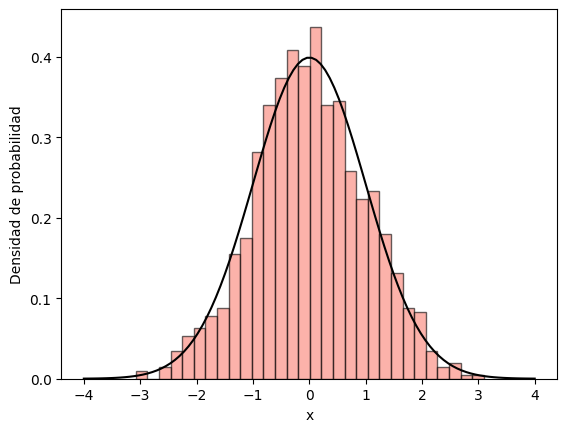

In [5]:
# Importamos varias librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar 1000 valores aleatorio de una distribución normal: mean=0, std=1 
datos = norm.rvs(loc=0, scale=1, size=1000)

# Graficar histograma
plt.hist(datos, bins=30, color='salmon', alpha=0.6, density=True, edgecolor='black')

# Graficar la función de densidad de probabilidad (pdf)
x = np.linspace(-4,4, 100)
pdf = norm.pdf(x, loc=0, scale=1)  # mean=0, std=1
plt.plot(x, pdf, '-k') # linea continua negra
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.show()

#### En minería de datos es común modelar la demanda de prodcutos o servicios utilizando PDFs

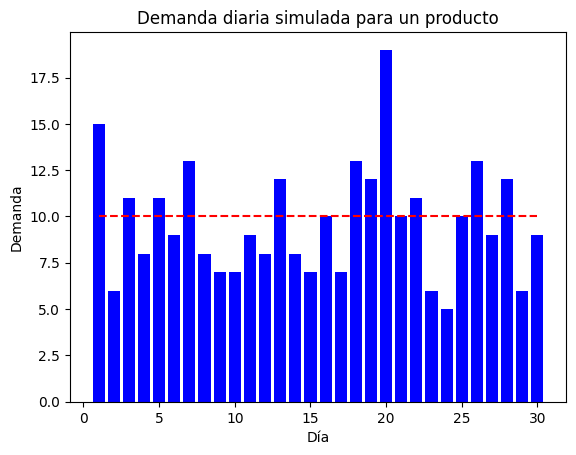

Demanda media: 9.7
Desviación estándar: 3.023794525647094


In [7]:
# Ejemplo: Uso de una distribución Poisson (común en conteos)

# Importamos varias librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import poisson

# Parámetros: tasa promedio de demanda por día
media_demanda = 10
# Generar datos simulados para 30 días de demanda
dias = 30
demanda = poisson.rvs(mu=media_demanda, size=dias)

x_dias = np.arange(1, dias+1)

# Visualizar los datos
plt.bar(np.arange(1, dias+1), demanda, color='blue')
plt.plot(x_dias, np.ones(30)*media_demanda, '--r')  # discontinuo y rojo
plt.xlabel('Día')
plt.ylabel('Demanda')
plt.title('Demanda diaria simulada para un producto')
plt.show()

# Analizar la media y la std de la demanda simulada
print(f'Demanda media: {np.mean(demanda)}')
print(f'Desviación estándar: {np.std(demanda)}')

### Pruebas estadísticas: t-test (para comparar medias de muestras) y chi-cuadrado

### `ttest_1samp`, `ttest_ind()` del módulo `scipy.stats`

In [10]:
# Ejemplo de uso
# t-test nos permite verificar si la nueva estrategia de marketing ha tenido efecto significativo

import scipy
from scipy.stats import ttest_ind

# Paso 1: Datos de ingresos diarios antes y después de estrategia
ingresos_antes = [200, 220, 210, 250, 230, 240, 210, 220, 225, 215]
ingresos_despues = [260, 280, 270, 290, 300, 310, 290, 285, 295, 275]

# Paso 2: Realizar el t-test de las dos muestras
t_stat, p_value = ttest_ind(ingresos_antes, ingresos_despues)

# ttest_ind retorna: t_stat = valor estadístico de t, p_value: p-valor

print(f't-statistics: {t_stat}, p-value: {p_value}')

# Evaluación de hipótesis
if p_value < 0.05:
    print(f"\nHay una diferencia significativa en los ingresos")
else:
    print(f"No hay una evidencia suficiente para para afirmar que la estrategia significativa")

t-statistics: -9.545904555635927, p-value: 1.8171033536620365e-08

Hay una diferencia significativa en los ingresos


### Regresión lineal: `linregress`

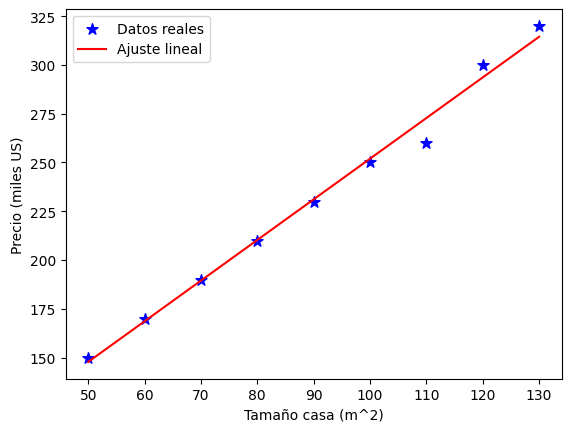

Pendiente: 2.083 +/- 0.077
Incertibumbre relativa porcentual: 3.68 %

Intercepto: 43.611111111111114
R^2: 0.9905959425190195
p-value: 2.355754842029665e-08


In [23]:
import scipy
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

# Datos:
# Tamaño de una casa (m^2)
# Precio de la casa (miles de US)
tamano = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130])
precio = np.array([150, 170, 190, 210, 230, 250, 260, 300, 320])

# Realizar la regresión lineal usando linregress
slope, intercept, r_value, p_value, std_err = linregress(tamano, precio)

# Función de línea de regresión
precio_regresion = slope*tamano + intercept  # y = mx + b

# Graficar los datos y línea de regresión
plt.scatter(tamano, precio, c='blue', s=70, marker='*', label='Datos reales')
plt.plot(tamano, precio_regresion, '-r', label='Ajuste lineal')
plt.xlabel('Tamaño casa (m^2)')
plt.ylabel('Precio (miles US)')
plt.legend()
plt.show()

# Mostrar los resultados
print(f'Pendiente: {slope:.3f} +/- {std_err:.3f}')
print(f'Incertibumbre relativa porcentual: {(std_err/slope)*100:.2f} %')
print(f'\nIntercepto: {intercept}')
print(f'R^2: {r_value**2}')  # Valor entre 0 y 1. Indica que tan bien al línea recta ajusta los datos
print(f'p-value: {p_value}')

## Optimización en Scipy: `scipy.optimize`

#### Buscar el submódulo `curve_fit()` para regresiones/ajustes no-lineales 



In [ ]:
from scipy.optimize import curve_fit